In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcdefaults()

In [21]:
# Change data path (relative path wasn't working, du coup j'ai give up)
data_folder = '../Data/MovieSummaries/'

#Faudrait qu'on choisisse bien les noms d'ailleurs
movie_column_names = [
    'wiki_movie_ID',
    'fb_movie_ID',
    'movie_name',
    'release_date',
    'box_office',
    'runtime',
    'languages',
    'countries',
    'genres'
]

movie = pd.read_csv(data_folder + 'movie.metadata.tsv', sep='\t', names=movie_column_names)

In [22]:
movie.head()

,wiki_movie_ID,fb_movie_ID,movie_name,release_date,box_office,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [23]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wiki_movie_ID  81741 non-null  int64  
 1   fb_movie_ID    81741 non-null  object 
 2   movie_name     81741 non-null  object 
 3   release_date   74839 non-null  object 
 4   box_office     8401 non-null   float64
 5   runtime        61291 non-null  float64
 6   languages      81741 non-null  object 
 7   countries      81741 non-null  object 
 8   genres         81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


10.27758407653442


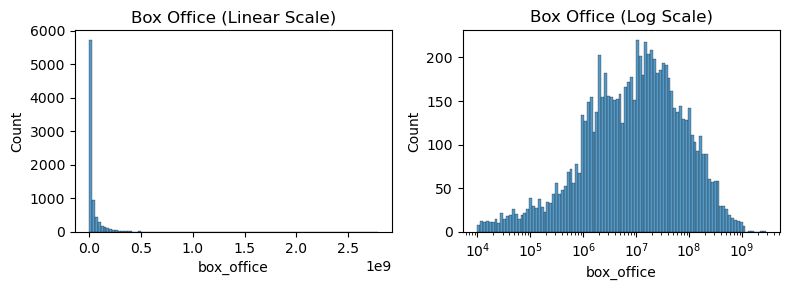

In [24]:
print(100*(movie['box_office'].count() / len(movie.box_office)))
# Pas mal de donnee qui manque pour box office

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

sns.histplot(data=movie, x="box_office", bins=100, ax=ax[0])
ax[0].set_title("Box Office (Linear Scale)")

sns.histplot(data=movie, x="box_office", bins=100, log_scale=True, ax=ax[1])
ax[1].set_title("Box Office (Log Scale)")

plt.tight_layout()
plt.show()

In [25]:
movie.describe()
# euh, le max de runtime est tres bizarre

,wiki_movie_ID,box_office,runtime
count,8.174100e+04,8.401000e+03,6.129100e+04
mean,1.740784e+07,4.799363e+07,1.118192e+02
std,1.098791e+07,1.121753e+08,4.360070e+03
min,3.300000e+02,1.000000e+04,0.000000e+00
25%,7.323695e+06,2.083193e+06,8.100000e+01
50%,1.777899e+07,1.063969e+07,9.300000e+01
75%,2.715573e+07,4.071696e+07,1.060000e+02
max,3.750192e+07,2.782275e+09,1.079281e+06


0.08074283407347597


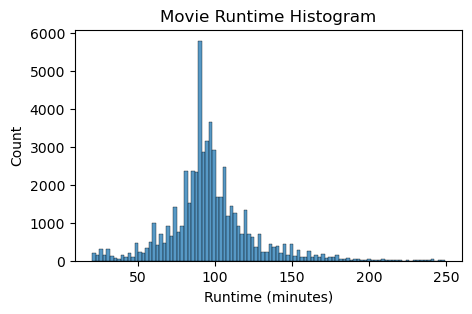

In [26]:
print(len(movie.query('runtime>400'))/len(movie)*100)
# en effet, il y a bcp de valeurs tres grandes

movie.query('runtime<250', inplace=True) # on drop les plus de 4 heures?
movie.query('runtime>20', inplace=True)

plt.figure(figsize=(5, 3))
sns.histplot(data=movie, x="runtime", bins=100)
plt.title("Movie Runtime Histogram")
plt.xlabel("Runtime (minutes)")
plt.show()

In [27]:
movie.genres.unique()
# un peu chiant le format

array(['{"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}',
       '{"/m/02n4kr": "Mystery", "/m/03bxz7": "Biographical film", "/m/07s9rl0": "Drama", "/m/0hj3n01": "Crime Drama"}',
       '{"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "Drama"}', ...,
       '{"/m/0lsxr": "Crime Fiction", "/m/01jfsb": "Thriller", "/m/01z4y": "Comedy", "/m/0fdjb": "Supernatural"}',
       '{"/m/01z02hx": "Sports", "/m/0lsxr": "Crime Fiction", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama"}',
       '{"/m/06n90": "Science Fiction", "/m/0gw5n2f": "Japanese Movies", "/m/03k9fj": "Adventure", "/m/0hcr": "Animation", "/m/02hmvc": "Short Film", "/m/0jxy": "Anime", "/m/07s9rl0": "Drama"}'],
      dtype=object)

95.7681359441042


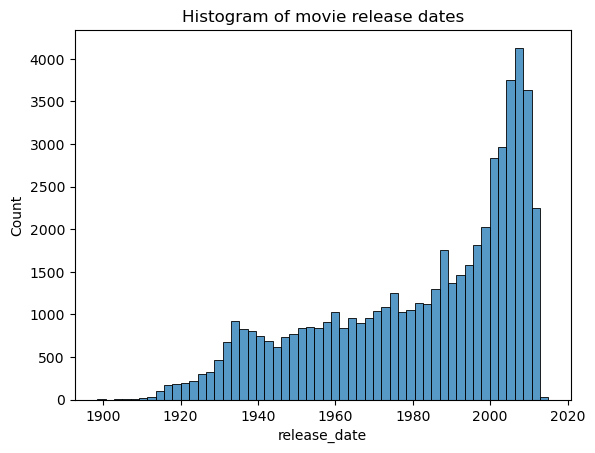

In [28]:
release_dates = pd.to_datetime(movie['release_date'], errors='coerce', yearfirst=True)

print(100*release_dates.count()/len(release_dates))

sns.histplot(release_dates.dropna())
plt.title('Histogram of movie release dates')
plt.show()

In [29]:
character_column_names = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie release date',
    'Character name',
    'Actor DOB',
    'Actor gender',
    'Actor height',
    'Actor ethnicity',
    'Actor name',
    'Actor age at movie release',
    'Freebase character map',
    'Freebase character ID',
    'Freebase actor ID'
]

character = pd.read_csv( data_folder + 'character.metadata.tsv', delimiter='\t', names=character_column_names)
character.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character map,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


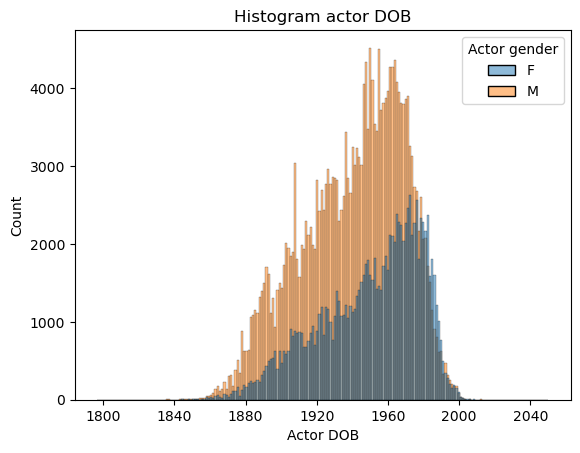

In [30]:
character['Actor DOB'] = pd.to_datetime(character['Actor DOB'], infer_datetime_format=True, errors='coerce').dropna()

sns.histplot(data=character, x='Actor DOB', hue='Actor gender')
plt.title('Histogram actor DOB')
plt.show()

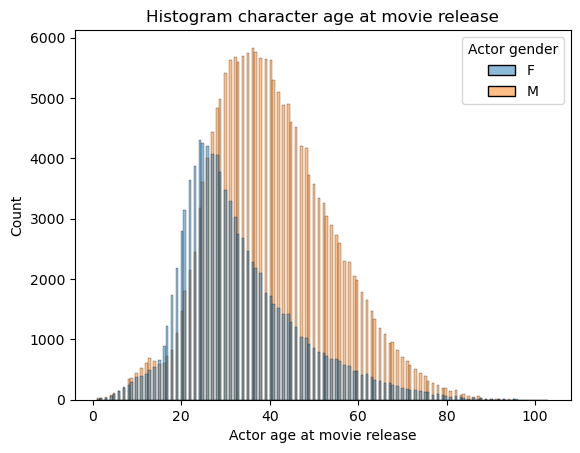

In [31]:
character.query("`Actor age at movie release` > 0 and `Actor age at movie release` < 110", inplace=True)

sns.histplot(data = character, x = 'Actor age at movie release', hue = 'Actor gender')
plt.title('Histogram character age at movie release')
plt.show()

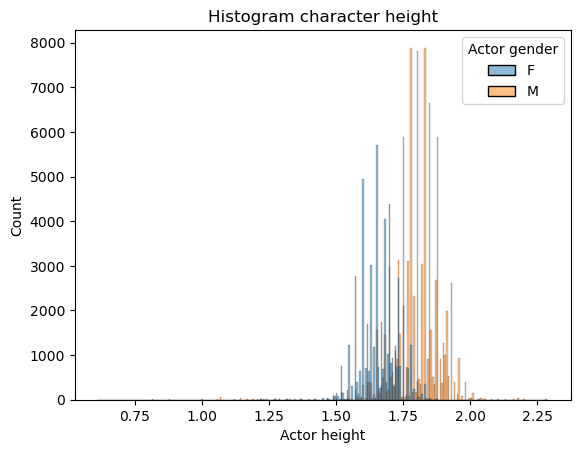

In [32]:
character.query("`Actor height` > 0.5 and `Actor height` < 2.3", inplace=True)

sns.histplot(data = character, x = 'Actor height', hue = 'Actor gender')
plt.title('Histogram character height')
plt.show()

In [33]:
movie.head()

,wiki_movie_ID,fb_movie_ID,movie_name,release_date,box_office,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [34]:
def parse_dict(s):
    try:
        genres_dict = eval(s.replace('null', 'None'))
        return list(genres_dict.values())
    except:
        return []

# parse weird columns
movie['genres'] = movie['genres'].apply(parse_dict)

In [35]:
movie.head()

,wiki_movie_ID,fb_movie_ID,movie_name,release_date,box_office,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}",[Drama]


In [36]:
movie_genres_exploded = movie.explode('genres')

In [47]:
(movie_genres_exploded.groupby('genres').count())<10

,wiki_movie_ID,fb_movie_ID,movie_name,release_date,box_office,runtime,languages,countries
genres,,,,,,,,
Absurdism,False,False,False,False,False,False,False,False
Acid western,True,True,True,True,True,True,True,True
Action,False,False,False,False,False,False,False,False
Action Comedy,False,False,False,False,False,False,False,False
Action Thrillers,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
World History,False,False,False,False,True,False,False,False
World cinema,False,False,False,False,False,False,False,False
Wuxia,False,False,False,False,True,False,False,False


In [56]:
filtered_genres = movie_genres_exploded['genres'].value_counts()
genres_to_keep = filtered_genres[filtered_genres >= 300].index
movie_genres_filtered = movie_genres_exploded[movie_genres_exploded['genres'].isin(genres_to_keep)]


In [57]:
movie_genres_filtered.groupby('genres').count()

,wiki_movie_ID,fb_movie_ID,movie_name,release_date,box_office,runtime,languages,countries
genres,,,,,,,,
Action,6794,6794,6794,6616,1751,6794,6794,6794
Action Thrillers,502,502,502,494,183,502,502,502
Action/Adventure,4511,4511,4511,4509,1358,4511,4511,4511
Adventure,4091,4091,4091,4005,1156,4091,4091,4091
Animation,1540,1540,1540,1485,328,1540,1540,1540
...,...,...,...,...,...,...,...,...
Television movie,928,928,928,928,8,928,928,928
Thriller,7791,7791,7791,7641,1951,7791,7791,7791
War film,2316,2316,2316,2264,410,2316,2316,2316
